In [61]:
import pandas as pd
data = pd.read_csv("houseprice.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [63]:
import pandas as pd
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
#from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

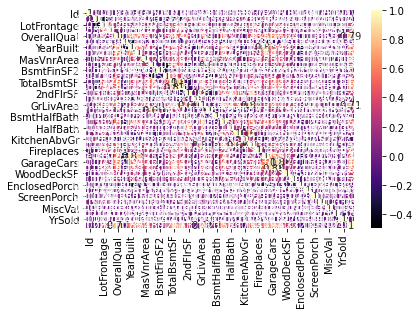

In [64]:
# 1. Heatmap

sb.heatmap(data.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [65]:
import re
import pandas as pd
from matplotlib import pyplot
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


sns.set()
%matplotlib inline


#delete columns with many missing data
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis = 1,inplace=True)

#Drop rows with missing data 
data.dropna(inplace=True)

from sklearn.model_selection import train_test_split
data = pd.get_dummies(data) #Getting dummies for categorical values

#Splitting test and train
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'SalePrice'], data['SalePrice'], test_size=0.25, random_state=42)

In [66]:
from sklearn.decomposition import PCA

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca


pca_train_results, pca_train = pca_dec(X_train, 10)


pca_test_results, pca_test = pca_dec(X_test, 10)


names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.985988
1   PCA Component 2                  0.004436
2   PCA Component 3                  0.003187
3   PCA Component 4                  0.002591
4   PCA Component 5                  0.001587
5   PCA Component 6                  0.000903
6   PCA Component 7                  0.000401
7   PCA Component 8                  0.000240
8   PCA Component 9                  0.000189
9  PCA Component 10                  0.000181


In [67]:
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_train.columns)})
df = df.sort_values('PCA', ascending=False)


df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)


df.head()

,PCA,Variable Names
2,0.999730,LotArea
15,0.013377,GrLivArea
12,0.011297,1stFlrSF
11,0.010933,TotalBsmtSF
8,0.009208,BsmtFinSF1
